## Binary Image Classification Using Simple CNN

Qurat Ul Ain Syeda

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from PIL import Image

In [ ]:
#We created the following code to ensure none of our image files were corrupted
#dataset_dir = os.path.join("Dataset/") -- The path to all our images
#files = os.listdir(dataset_dir)
#try:
    #for file in files:
        #image = Image.open(dataset_dir+"/"+file)
        #print(file)
        #image.verify()
#except:
    #print("Cannot identify image file: "+ file)

In [2]:
#Directory with poisonous plants
train_p_dir = os.path.join("Dataset/Train/class_p")
val_p_dir = os.path.join("Dataset/Val/class_p")

#Directory with non-poisonous plants
train_np_dir = os.path.join("Dataset/Train/class_np")
val_np_dir = os.path.join("Dataset/Val/class_np")

#Directory with test images

test_dir = os.path.join("Dataset/Test/test_folder")

In [3]:
print("Total Poisonous Plants Images in Training Set:",len(os.listdir(train_p_dir)))
print("Total Non-poisonous Plants Images in Training Set:",len(os.listdir(train_np_dir)))
print("Total Poisonous Plants Images in Validation Set:",len(os.listdir(val_p_dir)))
print("Total Non-poisonous Plants Images in Validation Set:",len(os.listdir(val_np_dir)))
print("Total Plants Images in Test Set:",len(os.listdir(test_dir)))

Total Poisonous Plants Images in Training Set: 260
Total Non-poisonous Plants Images in Training Set: 260
Total Poisonous Plants Images in Validation Set: 15
Total Non-poisonous Plants Images in Validation Set: 15
Total Plants Images in Test Set: 30


In [4]:
#Augmentations that are applied to training image
train_datagen = ImageDataGenerator(
        rescale =1./255,
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

validation_datagen = ImageDataGenerator(rescale =1./255)
test_datagen = ImageDataGenerator(rescale =1./255)

# Flow training images in batches of 30 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Dataset/Train',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200x200
        color_mode = "rgb",
        batch_size=30,
        # Use binary labels
        class_mode='binary',
        shuffle = True,
        seed = 42)

# Flow validation images in batches of 5 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'Dataset/Val',  # This is the source directory for validation images
        target_size=(200, 200),  # All images will be resized to 200x200
        color_mode = "rgb",
        batch_size=5,
        # Use binary labels
        class_mode='binary',
        shuffle= True,
        seed = 42)

#Flow test images in batches of 1 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    directory="Dataset/Test",
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=1, #Set this to some number that divides your total number of images in your test set exactly
    class_mode=None, #Set this to None, to return only the images
    shuffle=False,#Set this to False, because you need to yield the images in “order”
    seed=42)

Found 520 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 1 classes.


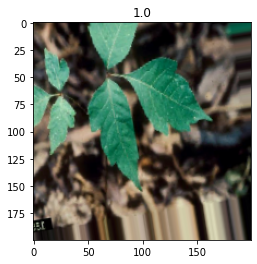

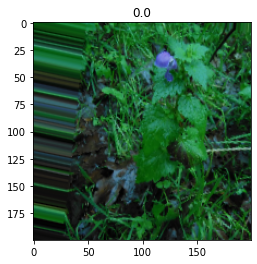

In [5]:
x,y = train_generator.next()
for i in range(0,2):
    image = x[i]
    title = y[i]
    plt.title(title)
    plt.imshow(image)
    plt.show()

In [6]:
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1
tf.keras.layers.Dense(1, activation='sigmoid')])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [8]:
model.compile(optimizer = tf.optimizers.RMSprop(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

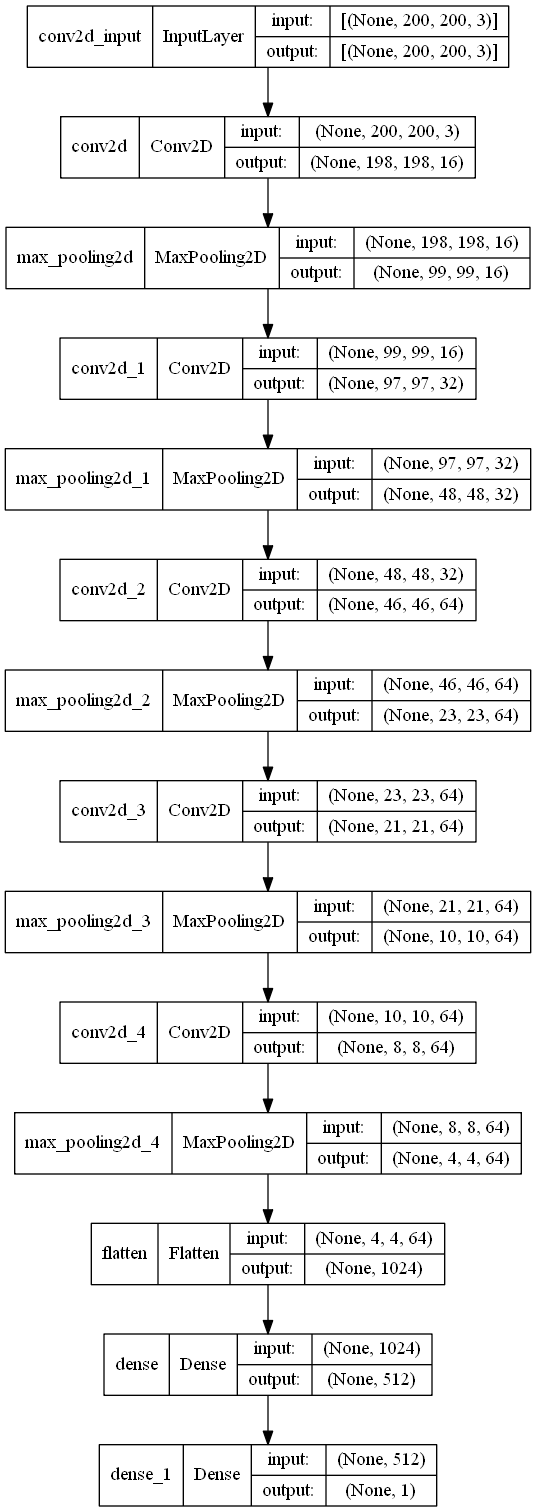

In [9]:
keras.utils.plot_model(model, show_shapes=True)

In [10]:
#Note that steps_per_epoch was set along with batch_size in ImageDataGenerator
#so that steps_per_epoch * batch_size = total # of images. 
#For example, for training, 8 * 120 = 960, just under our total of 999 images

In [11]:
#Training
history = model.fit(train_generator, 
                    epochs= 15,  # one forward/backward pass of training data
                    steps_per_epoch=train_generator.n//train_generator.batch_size,  # number of images comprising of one epoch
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n//validation_generator.batch_size)

Epoch 1/15
17/17 [==============================] - 18s 1s/step - loss: 0.7548 - accuracy: 0.4898 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 2/15
17/17 [==============================] - 18s 1s/step - loss: 0.6910 - accuracy: 0.4816 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 3/15
17/17 [==============================] - 18s 1s/step - loss: 0.7238 - accuracy: 0.5735 - val_loss: 0.6739 - val_accuracy: 0.5333
Epoch 4/15
17/17 [==============================] - 17s 1s/step - loss: 0.6428 - accuracy: 0.6612 - val_loss: 0.5080 - val_accuracy: 0.8000
Epoch 5/15
17/17 [==============================] - 18s 1s/step - loss: 0.6706 - accuracy: 0.6714 - val_loss: 0.5009 - val_accuracy: 0.8333
Epoch 6/15
17/17 [==============================] - 17s 1s/step - loss: 0.5915 - accuracy: 0.7163 - val_loss: 0.3929 - val_accuracy: 0.8667
Epoch 7/15
17/17 [==============================] - 18s 1s/step - loss: 0.6031 - accuracy: 0.6980 - val_loss: 0.4200 - val_accuracy: 0.8000
Epoch 8/15
17/17 [==

In [12]:
model.evaluate(validation_generator)

6/6 [==============================] - 0s 69ms/step - loss: 0.4129 - accuracy: 0.8333


[0.41287463903427124, 0.8333333134651184]

In [13]:
model.save_weights('pre-tuning_simplecnn.h5')

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

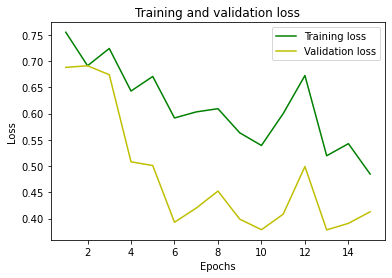

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'g', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

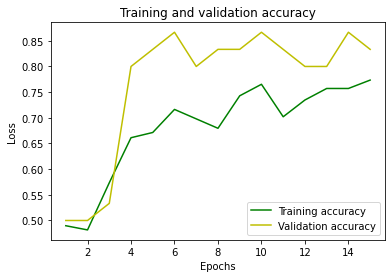

In [18]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Predicting on Test Set

This image is 0.00 percent a non-poisonous plant and 100.00 percent a poisonous plant.


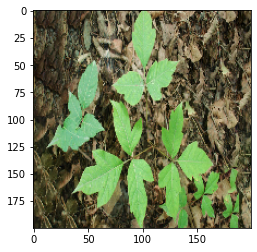

In [19]:
img = keras.preprocessing.image.load_img(
    "Dataset/Test/test_folder/Ivy-46.jpeg", target_size=(200, 200)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
plt.imshow(img)
print(
    "This image is %.2f percent a non-poisonous plant and %.2f percent a poisonous plant."
    % (100 * (1 - score), 100 * score)
)

This image is 0.00 percent non-poisonous and 100.00 percent poisonous.


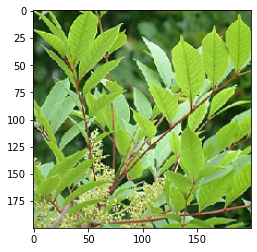

In [21]:
img = keras.preprocessing.image.load_img(
    "Dataset/Test/test_folder/poison_sumac_50.jpg", target_size=(200, 200)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
plt.imshow(img)
print(
    "This image is %.2f percent non-poisonous and %.2f percent poisonous."
    % (100 * (1 - score), 100 * score)
)

This image is 0.00 percent non-poisonous and 100.00 percent poisonous.


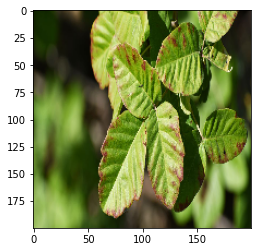

In [22]:
img = keras.preprocessing.image.load_img(
    "Dataset/Test/test_folder/Oak-46.jpeg", target_size=(200, 200)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
plt.imshow(img)
print(
    "This image is %.2f percent non-poisonous and %.2f percent poisonous."
    % (100 * (1 - score), 100 * score)
)

This image is 100.00 percent non-poisonous and 0.00 percent poisonous.


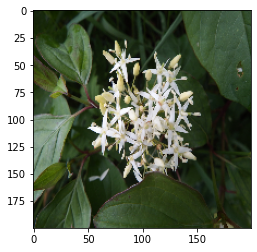

In [23]:
img = keras.preprocessing.image.load_img(
    "Dataset/Test/test_folder/2409.jpg", target_size=(200,200)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
plt.imshow(img)
print(
    "This image is %.2f percent non-poisonous and %.2f percent poisonous."
    % (100 * (1 - score), 100 * score)
)

## Hyperparameter Tuning w/ Keras Tuner

In [24]:
import keras_tuner as kt

In [25]:
def build_model(hp):
    model = keras.Sequential()
    
    #First conv
    model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)))
    model.add(keras.layers.MaxPooling2D(2, 2))
    
    # The second convolution
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))

    # The third convolution
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))

    # The fourth convolution
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
     # The fifth convolution
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
          
    
    model.add(keras.layers.Flatten())
    #We had 512 neurons in hidden layer
    model.add(keras.layers.Dense(hp.Int('units', min_value = 32, max_value = 512, step = 128),'relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    #We had learning rate set to 0.001
    model.compile(optimizer = keras.optimizers.RMSprop(hp.Choice('learning_rate', values = [0.01,0.001,0.0001])),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
    return model

In [6]:
import keras_tuner as kt

In [27]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy', #maximize val accuracy
    max_trials=10, #only try 10 times
    executions_per_trial = 3) #3 combinations per trial

In [28]:
tuner.search(train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size,
             epochs=15, validation_data=validation_generator)

Trial 10 Complete [00h 15m 48s]
val_accuracy: 0.5222222208976746

Best val_accuracy So Far: 0.9111110965410868
Total elapsed time: 04h 05m 06s
INFO:tensorflow:Oracle triggered exit


In [29]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [30]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.001
Score: 0.9111110965410868
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.001
Score: 0.8666666547457377
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.001
Score: 0.8666666547457377
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.0001
Score: 0.8111111124356588
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.0001
Score: 0.8111111124356588
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.0001
Score: 0.799999992052714
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.0001
Score: 0.7888888915379842
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.01
Score: 0.5222222208976746
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.01
Score: 0.5111111203829447
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.01
Score: 0.51111112038

In [32]:
best_model = tuner.get_best_models()[0]

In [33]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [37]:
#learning rate = 0.001
best_model

In [39]:
#Training
history = best_model.fit(train_generator, 
                    epochs= 15,  # one forward/backward pass of training data
                    steps_per_epoch=train_generator.n//train_generator.batch_size,  # number of images comprising of one epoch
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n//validation_generator.batch_size)

Epoch 1/15
17/17 [==============================] - 19s 1s/step - loss: 0.5291 - accuracy: 0.7592 - val_loss: 0.3132 - val_accuracy: 0.9333
Epoch 2/15
17/17 [==============================] - 19s 1s/step - loss: 0.5096 - accuracy: 0.7408 - val_loss: 0.3528 - val_accuracy: 0.8333
Epoch 3/15
17/17 [==============================] - 20s 1s/step - loss: 0.4575 - accuracy: 0.7673 - val_loss: 0.2764 - val_accuracy: 0.9333
Epoch 4/15
17/17 [==============================] - 20s 1s/step - loss: 0.4839 - accuracy: 0.7551 - val_loss: 0.3834 - val_accuracy: 0.7333
Epoch 5/15
17/17 [==============================] - 20s 1s/step - loss: 0.4453 - accuracy: 0.7878 - val_loss: 0.3560 - val_accuracy: 0.8333
Epoch 6/15
17/17 [==============================] - 20s 1s/step - loss: 0.4218 - accuracy: 0.7922 - val_loss: 0.2272 - val_accuracy: 0.9333
Epoch 7/15
17/17 [==============================] - 20s 1s/step - loss: 0.4748 - accuracy: 0.7776 - val_loss: 0.2976 - val_accuracy: 0.9000
Epoch 8/15
17/17 [==

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

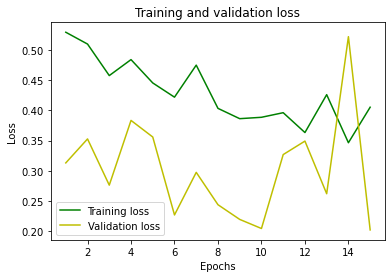

In [41]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'g', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

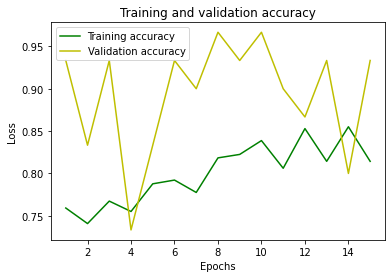

In [43]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()